# ***Problem Statement:*** Unemployment is measured by the unemployment rate which is the number of peoplewho are unemployed as a percentage of the total labour force. We have seen a sharpincrease in the unemployment rate during Covid-19, so analyzing the unemployment ratecan be a good data science project.

**Objective:**
1. Analyze unemployment rate in India
2. Study how unemployment changed during Covid-19
3. Identify trends across time, regions, and states
4. Visualize the impact clearly



**Step 1:** Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization style
sns.set(style="whitegrid")


**Step 2:** Loading dataset

In [3]:
df = pd.read_csv("/content/Unemployment in India Project 2 dataset.csv")

**Step 3:** Exploring the Dataset

1. Viewing fiirst 100 rows

In [4]:
df.head(100)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
95,Haryana,30-06-2019,Monthly,23.08,4745178.0,45.23,Rural
96,Haryana,31-07-2019,Monthly,16.22,4826560.0,42.17,Rural
97,Haryana,31-08-2019,Monthly,30.94,4558306.0,48.23,Rural
98,Haryana,30-09-2019,Monthly,16.36,5127956.0,44.72,Rural


2. Checking dataset shape

In [5]:
df.shape

(768, 7)

3. Column names

In [6]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

4. Information of Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


**Step 4:** Cleaning The data

Firstly removing unwanted spaces from column names

In [8]:
df.columns = df.columns.str.strip()

Then Checking missing values

In [9]:
df.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


Then If any missing value is present then drop it

In [10]:
df.dropna(inplace=True)

**Step 5:** Remaning the column names for simplicity

In [11]:
df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
}, inplace=True)


**Step 6:** Conversion of date column

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

/tmp/ipython-input-2394721818.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


**Step 7:** For basic Statistical Analysis (Description of data)

This tells us:
1. Average unemployment rate
2. Minimum and maximum values
3. Data spread

In [14]:
df.describe()

,Date,Unemployment_Rate,Employed,Labour_Participation_Rate
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


**Step 8:** Unemployment rate over time (The Covid Impact)

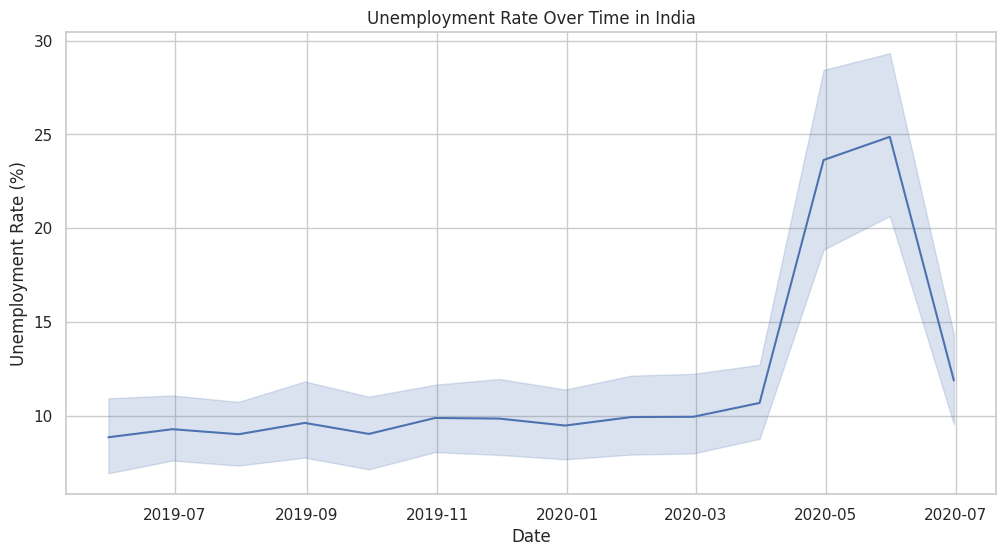

In [15]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Unemployment_Rate', data=df)
plt.title("Unemployment Rate Over Time in India")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()


**Key Observation:**
You will clearly see a sharp spike during Covid-19 months (2020).

**Step 9:** Region-wise Unemployment Analysis

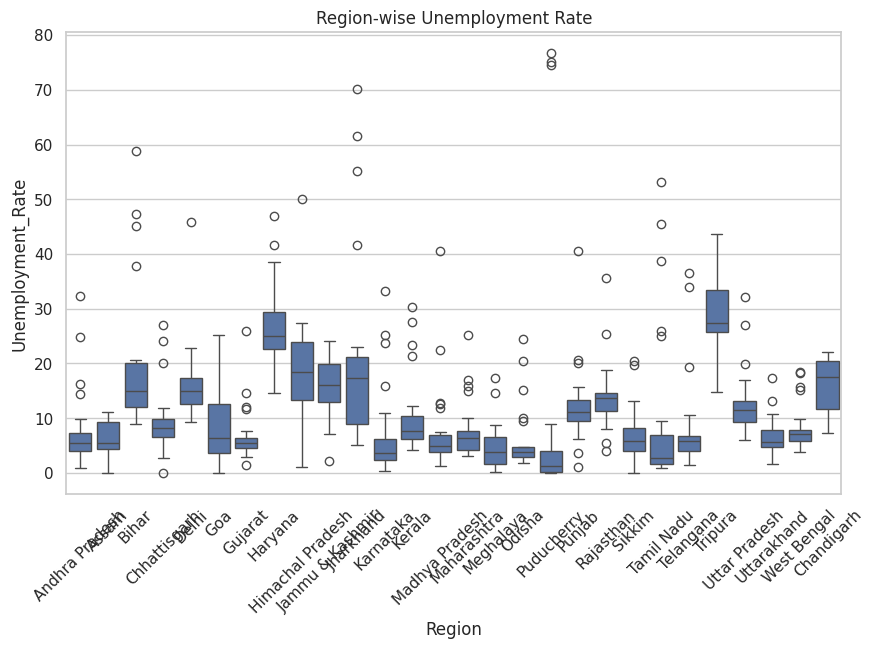

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Region', y='Unemployment_Rate', data=df)
plt.xticks(rotation=45)
plt.title("Region-wise Unemployment Rate")
plt.show()


**Step 10:** State-wise Average Unemployment Rate

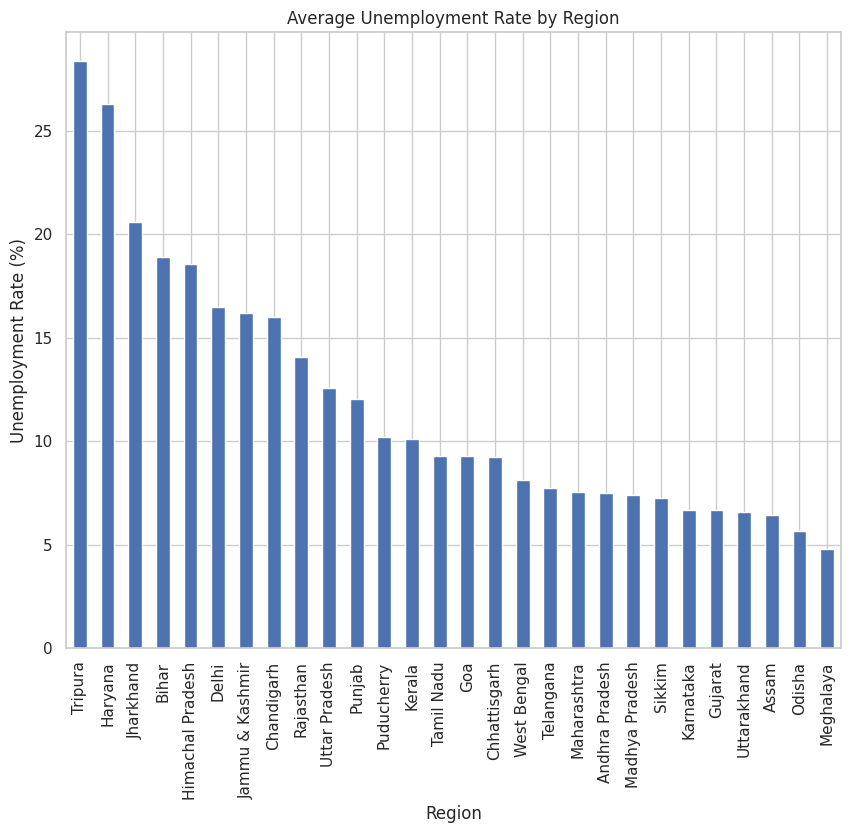

In [18]:
state_avg = df.groupby("Region")["Unemployment_Rate"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,8))
state_avg.plot(kind='bar')
plt.title("Average Unemployment Rate by Region")
plt.ylabel("Unemployment Rate (%)")
plt.show()

**Step 11:** Heatmap for Correlation Analysis

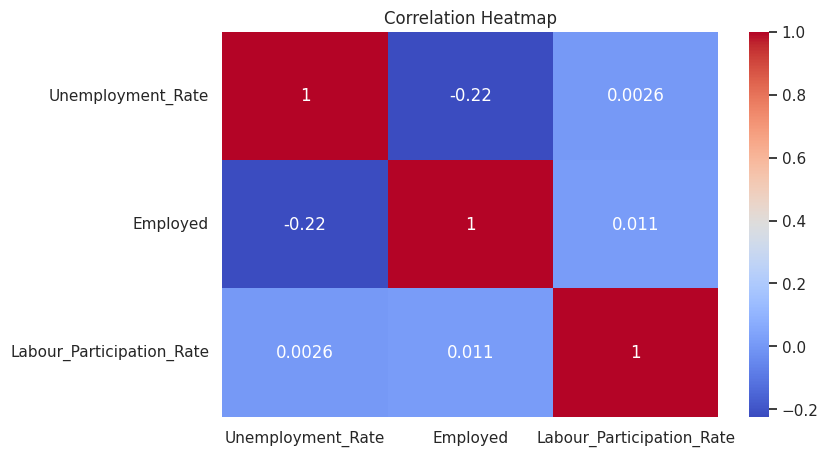

In [19]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['Unemployment_Rate', 'Employed', 'Labour_Participation_Rate']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


**Step 12:** Before VS During Covid

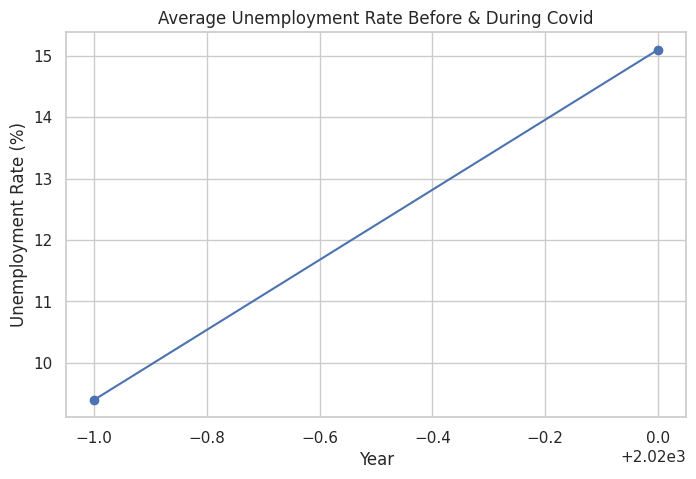

In [20]:
df['Year'] = df['Date'].dt.year

covid_analysis = df.groupby('Year')['Unemployment_Rate'].mean()

covid_analysis.plot(kind='line', marker='o', figsize=(8,5))
plt.title("Average Unemployment Rate Before & During Covid")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()


**Conclusion:** This project analyzed unemployment trends in India with a special focus on the Covid-19 period. The results show a significant rise in unemployment due to lockdowns and economic slowdown. Visual analysis helped identify affected regions and states, making this study useful for policymakers and economic planning.